In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
#from tqdm import tqdm_notebook
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [5]:
def plot_train_test(data_train: pd.DataFrame, data_test:pd.DataFrame, actual:str, predicted:str):
    plt.figure(figsize=(12,6))
    # Plot y1 and y2 from df1 with specified colors
    plt.plot(data_train.index[1:], data_train[actual][1:], color='blue', label=actual)
    plt.plot(data_train.index[1:], data_train[predicted][1:], color='orange', label=f'{predicted} in sample')

    # Plot y1 from df2 with specified color
    plt.plot(data_test.index, test[actual], color='blue', label='')

    # Plot y2 from df2 with specified color and label
    plt.plot(data_test.index, test[predicted], color='red', label=f'{predicted} out of sample')

    # Set the title and labels
    plt.title('In sample vs out of sample prediction')
    plt.xlabel('Date')
    plt.ylabel('Values')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


def train_and_plot(data_train:pd.DataFrame,data_test:pd.DataFrame,p:int, i:int,q:int, actual:str,length_test:int):
    model = ARIMA(data_train[actual], order=(p, i, q)).fit()
    print((model.summary()))
    label = f"ARIMA_{p}_{i}_{q}"
    train[label] = model.fittedvalues
    test[label] = model.forecast(length_test+1)
    plot_train_test(data_train=data_train, data_test=data_test, actual=actual,predicted=label)

In [43]:
def adfuller_and_diff(dataframe: pd.DataFrame, y: str):
    result = adfuller(dataframe[y])
    i = 1
    if result[1] > 0.05:
        print('Not stationary!')
        while True:
            dataframe[f'{y}_diff_{i}'] = dataframe[y].diff(periods=i)
            dataframe.dropna(inplace=True)
            result = adfuller(dataframe[f'{y}_diff_{i}'])
            if result[1] > 0.05:
                print('Still not stationary!')
                i += 1
                continue
            else:
                print('Stationary!')
                print(f'ADF: {result[0]}')
                print(f'p-value: {result[1]}')
                break


In [46]:
def plot_pacf_acf(dataframe: pd.DataFrame, y: str):
    plot_pacf(dataframe[y])
    plot_acf(dataframe[y])

In [44]:
df = pd.read_csv("NVDA.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

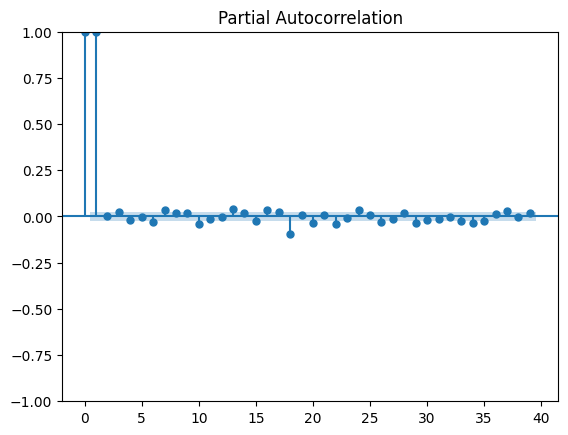

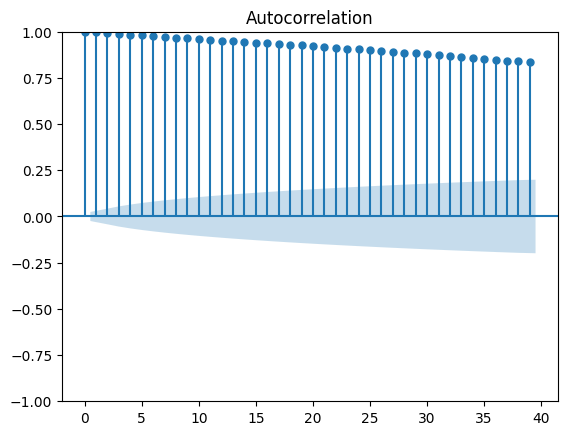

In [47]:
plot_pacf_acf(df, 'Close')